## Part III. Natural Language Processing 
- What are some of the ways in which we can engineer features in NLP?
- What is TF-IDF, how is it calculated? What does it represent?

In [3]:
review_1 = "6/10 Acting, not great but some good acting.<br /><br />4/10 Director, makes some stupid decisions for this film.<br /><br />2/10 Writer, story makes no sense at all and has huge amount of flaws.<br /><br />4/10 Overall score for this movie.<br /><br />Don't waste your time with this film, it's not worth it. I gave 4 for this movie and it may be too much. Characters are so over exaggerated than they can ever be in real life and some pretty unexplainable stuff happens 'storywise', not in good way. Because of the style this film has been filmed you get bored after 30 minutes (too many special effects: slow motions and camera shakes and fast forwards). It's always good that movie uses music to make the story go smooth but there's too many tracks in this one. In the first hour there is almost 50/50 dialogs and musics"
review_2 = "Devil Hunter gained notoriety for the fact that it's on the DPP 'Video Nasty' list, but it really needn't have been. Many films on the list where there for God (and DPP) only known reasons, and while this isn't the tamest of the bunch; there isn't a lot here that warrants banning...which is a shame because I never would have sat through it where it not for the fact that it's on 'the shopping list'. The plot actually gives the film a decent base - or at least more of a decent base than most cannibal films - and it follows an actress who is kidnapped and dragged off into the Amazon jungle. A hunter is then hired to find her, but along the way he has to brave the natives, lead by a man who calls himself 'The Devil' (hence the title). The film basically just plods along for eighty five minutes and there really aren't many scenes of interest. It's a real shame that Jess Franco ended up making films like this because the man clearly has talent; as seen by films such as The Diabolical Dr Z, Venus in Furs, Faceless and She Kills in Ecstasy, but unfortunately his good films are just gems amongst heaps of crap and Devil Hunter is very much a part of the crap. I saw this film purely because I want to be able to say I've seen everything on the DPP's list (just two more to go!), and I'm guessing that's why most other people who have seen it, saw it. But if you're not on the lookout for Nasties; there really is no reason to bother with this one."
review_3 = "`Stanley and Iris' is a heart warming film about two people who find each other and help one another overcome their problems in life. Stanley's life is difficult, because he never learned to read or write. Iris is a widower with two teenage children working in a bakery where she meets Stanley. She decides to teach Stanley how to read at her home in her spare time. Over time they become romantically involved. After Stanley learns to read, he goes off to a good job in Chicago, only to return to Iris and ask her to marry him.<br /><br />It's a really good film without nudity, violence, or profanity, that which is rare in today's films. A good film all round. <br /><br />"
review_4 = "This may not be a memorable classic, but it is a touching romance with an important theme that stresses the importance of literacy in modern society and the devastating career and life consequences for any unfortunate individual lacking this vital skill.<br /><br />The story revolves around Iris, a widow who becomes acquainted with a fellow employee at her factory job, an illiterate cafeteria worker named Stanley. Iris discovers that Stanley is unable to read, and after he loses his job, she gives him reading lessons at home in her kitchen. Of course, as you might predict, the two, although initially wary of involvement, develop feelings for each other...<br /><br />Jane Fonda competently plays Iris, a woman with problems of her own, coping with a job lacking prospects, two teenage children (one pregnant), an unemployed sister and her abusive husband. However, Robert DeNiro is of course brilliant in his endearing portrayal of the intelligent and resourceful, but illiterate, Stanley, bringing a dignity to the role that commands respect. They aren't your typical charming young yuppie couple, as generally depicted in on screen romances, but an ordinary working class, middle aged pair with pretty down to earth struggles.<br /><br />I won't give the ending away, but it's a lovely, heartwarming romance and a personal look into the troubling issue of adult illiteracy, albeit from the perspective of a fictional character."
df = pd.DataFrame([review_1,review_2,review_3, review_4],columns = ['review'])
df

,review
0,"6/10 Acting, not great but some good acting.<b..."
1,Devil Hunter gained notoriety for the fact tha...
2,`Stanley and Iris' is a heart warming film abo...
3,"This may not be a memorable classic, but it is..."


### what are some of the steps to engineer the features?

In [ ]:
#your answer here

- tokenization: each word is its own column
- n-grams: n-word combos that appear in the text are features
- stopwords: removing common words that don't distinguish documents
- lemmatization: transforming variations of words down to their "base element", eg "big" and "bigger" both represented as "big" after lemmatization
- tf-idf: measure of how unique a word is to a document

#### use `stopwords` and `TfidfVectorizer` to generate tf-idf'd data

In [4]:
# stop words removal
stopwords_list = stopwords.words('english')
# what if you need to remove more stopwords than this collection?
stopwords_list.append('power ranger')

# use tfidf 
vectorizer = TfidfVectorizer(stop_words=stopwords_list)
tf_idf_data = vectorizer.fit_transform(df['review'])

/Users/benoren/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['power', 'ranger'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [5]:
tf_idf_data

<4x293 sparse matrix of type '<class 'numpy.float64'>'
	with 331 stored elements in Compressed Sparse Row format>

#### How do we compare tf-idf values in the same row?

#### In the same column?

In [6]:
pd.DataFrame(tf_idf_data.toarray(), columns=vectorizer.vocabulary_.keys())

,10,acting,great,good,br,director,makes,stupid,decisions,film,...,personal,look,troubling,issue,adult,illiteracy,albeit,perspective,fictional,character
0,0.356302,0.089075,0.178151,0.000000,0.000000,0.000000,0.178151,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.089075,0.000000,0.000000,0.089075,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.073528,0.000000,0.000000,0.000000,0.073528,0.073528,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.073528,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.109477,0.000000,0.000000,0.086313,0.000000,0.000000,0.109477,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.080589,0.080589,0.000000,0.000000,0.000000,0.080589,...,0.000000,0.080589,0.080589,0.063537,0.000000,0.000000,0.000000,0.000000,0.080589,0.080589


Tf-idf is statistical measure used to evaluate how important a word is in a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

Values for words within the same document (ie, in the same row in the df above) can be compared to find relatively more important words in a document.

Values for the same word across documents (ie, in the same column in the df above) can be compared to find the document for which that word is most important.

### what are the step by step process of doing text classification with a model to make predictions?

In [30]:
# step 1 - train test split

# step 2 - tokenizing, feature engineering etc etc
    # make sure to .fit_transform on train and .transform on test where appropriate!

# step 3 - fit the model to the training set, test the model on the testing set

# step 4 - output prediction on testing set, 
# compare true labels to predicted labels, 
# get metrics (accuracy, precision, etc)

## Part IV. Time Series

In [8]:
ts = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [9]:
ts.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Convert `Date` to `datetime` format, set as the index, and drop

In [10]:
ts.info()
print()
ts['Date'] = pd.to_datetime(ts['Date'])

ts.info()

ts = ts.set_index(ts['Date'])

ts.drop('Date', inplace=True, axis=1)

ts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date    3650 non-null object
Temp    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date    3650 non-null datetime64[ns]
Temp    3650 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


### visualize the daily temperature 

/Users/benoren/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


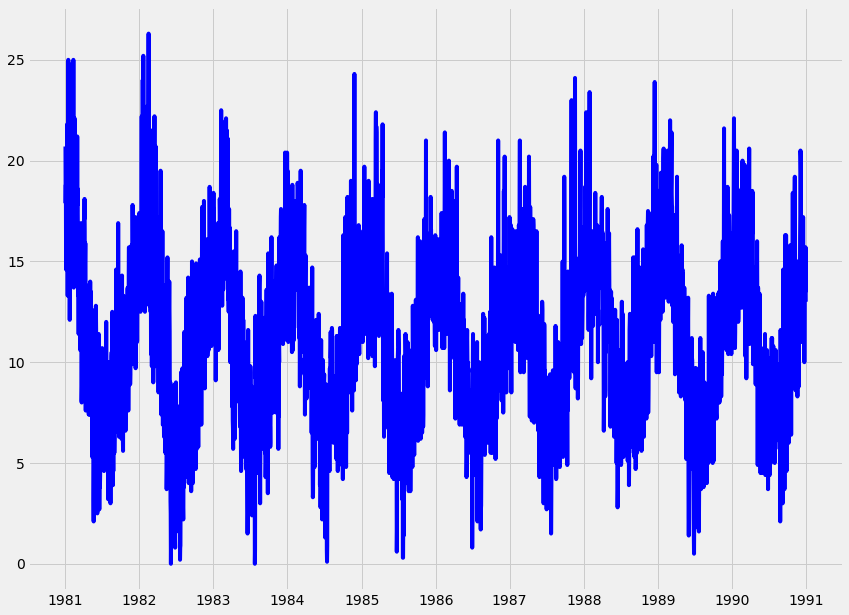

In [48]:
fig, ax = plt.subplots(figsize=(13, 10))
ax.plot(ts['Temp'], color='blue',label='Average monthly opening stock price')

### get only the monthly mean and assign to variable `temp_monthly`

### calculate the 3-month rolling mean

In [14]:
temp_monthly = ts.resample('MS').mean()
temp_monthly

,Temp
Date,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323
...,...
1990-08-01,7.825806
1990-09-01,9.166667
1990-10-01,11.345161


In [71]:
temp_monthly.rolling(window = 3).mean()

,Temp
date,
1981-01-01,NaN
1981-02-01,NaN
1981-03-01,16.297158
1981-04-01,14.511746
1981-05-01,11.782330
1981-06-01,9.717885
1981-07-01,8.124803
1981-08-01,7.374265
1981-09-01,8.319821


### What are some of the assumptions of using arima model? 

### Does our dataset satisfy this assumption?

### What kind of test can you use to find out?  How do we interpret the results of that test to determine whether it's stationary?

- mean and variance of ts are constant

- looks like it! but can't be sure

- dickey-fuller test (HO is that it's not stationary, HA is that it is, determine w/ p-value in usual way